# Synthetic Data using a Multivariate normal distribution

The obejctive of this work is to create a synthetic dataset with data samples belonging to two classes. Control the Gaussian mean and variance to overlap the two classes. 

#### Reference:
This notebook was created by modifying an example from: https://github.com/peterroelants/peterroelants.github.io/blob/main/notebooks/misc/multivariate-normal-primer.ipynb

In [1]:
# Imports
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm # Colormaps
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

sns.set_style('darkgrid')
np.random.seed(42)
#

### Multivariate normal distribution

The multivariate normal distribution is a multidimensional generalisation of the one-dimensional Gaussian distribution. It represents the distribution of a multivariate random variable that is made up of multiple random variables that can be correlated with each other.

Like the normal distribution, the multivariate normal is defined by sets of parameters: the mean vector $\mu$, which is the expected value of the distribution; and the covariance matrix $\Sigma$, which measures how dependent two random variables are and how they change together.

The multivariate normal with dimensionality $d$ has a joint probability density given by:

$$
p(\mathbf{x} \mid \mathbf{\mu}, \Sigma) = \frac{1}{\sqrt{(2\pi)^d \lvert\Sigma\rvert}} \exp{ \left( -\frac{1}{2}(\mathbf{x} - \mathbf{\mu})^T \Sigma^{-1} (\mathbf{x} - \mathbf{\mu}) \right)}
$$

The multivariate normal distribution for random vector $x$ of size $d$, where $\mu$ is the mean vector and $\Sigma$ is the (symmetric, positive definite) covariance matrix (of size $d$ x $d$) is denoted as:


$$
\mathcal{N}(\mathbf{\mu}, \Sigma)
$$


In [2]:
def multivariate_normal(x, d, mean, covariance):
    """pdf of the multivariate normal distribution."""
    x_m = x - mean
    return (1. / (np.sqrt((2 * np.pi)**d * np.linalg.det(covariance))) * 
            np.exp(-(np.linalg.solve(covariance, x_m).T.dot(x_m)) / 2))

In [3]:
# Plot bivariate distribution
def generate_surface(mean, covariance, d):
    """Helper function to generate density surface."""
    nb_of_x = 50 # grid size
    x1s = np.linspace(-6, 10, num=nb_of_x)
    x2s = np.linspace(-6, 10, num=nb_of_x)
    x1, x2 = np.meshgrid(x1s, x2s) # Generate grid
    pdf = np.zeros((nb_of_x, nb_of_x))
    # Fill the cost matrix for each combination of weights
    for i in range(nb_of_x):
        for j in range(nb_of_x):
            pdf[i,j] = multivariate_normal(
                np.matrix([[x1[i,j]], [x2[i,j]]]), 
                d, mean, covariance)
    return x1, x2, pdf  # x1, x2, pdf(x1,x2)

# subplot
#fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
#d = 2  # number of dimensions

# Plot of independent Normals
#bivariate_mean = np.matrix([[0.], [0.]])  # Mean
#bivariate_covariance = np.matrix([
#    [1., 0.], 
#    [0., 1.]])  # Covariance
#x1, x2, p = generate_surface(
#    bivariate_mean, bivariate_covariance, d)
# Plot bivariate distribution
#con = ax1.contourf(x1, x2, p, 33, cmap=cm.YlGnBu)
#ax1.set_xlabel('$x_1$', fontsize=13)
#ax1.set_ylabel('$x_2$', fontsize=13)
#ax1.axis([-2.5, 2.5, -2.5, 2.5])
#ax1.set_aspect('equal')
#ax1.set_title('Independent variables', fontsize=12)

# Plot of correlated Normals
#bivariate_mean = np.matrix([[0.], [1.]])  # Mean
#bivariate_covariance = np.matrix([
#    [1., 0.8], 
#    [0.8, 1.]])  # Covariance
#x1, x2, p = generate_surface(
#    bivariate_mean, bivariate_covariance, d)
# Plot bivariate distribution
#con = ax2.contourf(x1, x2, p, 33, cmap=cm.YlGnBu)
#ax2.set_xlabel('$x_1$', fontsize=13)
#ax2.set_ylabel('$x_2$', fontsize=13)
#ax2.axis([-2.5, 2.5, -1.5, 3.5])
#ax2.set_aspect('equal')
#ax2.set_title('Correlated variables', fontsize=12)

# Add colorbar and title
#fig.subplots_adjust(right=0.8)
#cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
#cbar = fig.colorbar(con, cax=cbar_ax)
#cbar.ax.set_ylabel('$p(x_1, x_2)$', fontsize=13)
#plt.suptitle('Bivariate normal distributions', fontsize=13, y=0.95)
#plt.show()
#

### Affine transformations of the multivariate normal
 
It is possible to transform a [multivariate normal](https://en.wikipedia.org/wiki/Multivariate_normal_distribution#Affine_transformation) distribution into a new normal distribution with an [affine transformation](https://en.wikipedia.org/wiki/Affine_transformation).

To transform a multivariate normal distribution into a new normal distribution with an affine transformation:
If $X$ is normally distributed and $Y = LX + u$ with $L$ a [linear transformation](https://en.wikipedia.org/wiki/Linear_map) and $u$ a vector then $Y$ is also normally distributed with mean $\mu_{Y} = u + L\mu_{X}$ and covariance matrix $\Sigma_{Y} = L\Sigma_{X}L^T$: 

$$Y \sim \mathcal{N}(\mu_{Y}, \Sigma_{Y}) \quad\quad X \sim \mathcal{N}(\mu_{X}, \Sigma_{X}) \\
\mathcal{N}(\mu_{Y}, \Sigma_{Y}) = \mathcal{N}(u + L\mu_{X}, L\Sigma_{X}L^T) = L\mathcal{N}(\mu_{X}, \Sigma_{X}) + u$$

The proof of transformation is in the original notebook referenced above.


## Sampling from a multivariate normal

The previous formula helps to [sample from any multivariate Guassian](https://en.wikipedia.org/wiki/Multivariate_normal_distribution#Drawing_values_from_the_distribution).  
First, sample $X$ from the standard normal distribution $X \sim \mathcal{N}(0, I_d)$, where the mean is the vector $\mu=0$ and the covariance is the [identity matrix](https://en.wikipedia.org/wiki/Identity_matrix) $\Sigma=I_d$. Sampling from this distribution is easier because each variable in $X$ is [independent](https://en.wikipedia.org/wiki/Linear_independence) from all other variables, we can just sample each variable separately.

It is then possible to sample $Y$ from $\mathcal{N}(\mu_{Y}, \Sigma_{Y})$ by sampling $X$ and applying the affine transform on the samples. This transform is $Y = LX + u$ where we know from the previous section that the covariance of $Y$ will be $\Sigma_{Y} = L\Sigma_{X}L^\top$. Since $\Sigma_{X}=I_d$ we can write that $\Sigma_{Y} = L I_d L^\top = L L^\top$. $L$ can now be found by a technique called the [Cholesky decompostion](https://en.wikipedia.org/wiki/Cholesky_decomposition) which does exactly the decomposition we need. 

The vector $u$ is then $\mu_{Y}$ since $\mu_{X}=0$ ($u = \mu_{Y} - L\mu_{X}$).


$$
Y
\sim
\mathcal{N}\left(
\begin{bmatrix} 0 \\ 
1 
\end{bmatrix},
\begin{bmatrix}
1 & 0.8 \\
0.8 & 1
\end{bmatrix}\right)
$$

The sampling is done by the following code and the samples are plotted as red dots on the probability density surface generated below.

Here, we define the gaussians for the two classes, the mean and covarience for each gaussian in the mixture. Class one has three gaussians and class 2 has 4. Compute $L$ using [Cholesky decompostion] and apply the above transformation $Y = LX + u$ that gives the samples $Y$. We also add labels to identify the samples in each clases (to use a binary classifier in the following section).

In [4]:
# Sample from:
d = 2 # Number of dimensions per Gaussian
# Define the mean for each Gaussian in Class1
mean11 = np.matrix([[-2.], [-1.]])
mean12 = np.matrix([[0.], [0.]])
mean13 = np.matrix([[1.], [2.]])
# Define the mean for each Gaussian in Class2
mean21 = np.matrix([[1.], [0.]])
mean22 = np.matrix([[3.], [0.]])
mean23 = np.matrix([[4.], [3.]])
mean24 = np.matrix([[2.], [1.]])
# Define the covarience for each Gaussian in Class1
covariance11 = np.matrix([
[1, 0.8],
[0.8, 1]
])
covariance12 = np.matrix([
[1, 0.6],
[0.6, 1]
])
covariance13 = np.matrix([
[1, 0.3],
[0.3, 1]
])
# Define the covarience for each Gaussian in Class2
covariance21 = np.matrix([
[1, 0.2],
[0.2, 1]
])
covariance22 = np.matrix([
[1, 0.5],
[0.5, 1]
])
covariance23 = np.matrix([
[1, 0.6],
[0.6, 1]
])
covariance24 = np.matrix([
[1, 0.6],
[0.6, 1]
])
# Create L for each Gaussian and concatenate in Class 1
L11 = np.linalg.cholesky(covariance11)
L12 = np.linalg.cholesky(covariance12)
L13 = np.linalg.cholesky(covariance13)
# Create L for each Gaussian and concatenate in Class 2
L21 = np.linalg.cholesky(covariance21)
L22 = np.linalg.cholesky(covariance22)
L23 = np.linalg.cholesky(covariance23)
L24 = np.linalg.cholesky(covariance24)
#-----------------------------Class 1--------------------------
# Sample X from standard normal for Class 1
n = 3000 # Samples to draw(initial=50)

X11 = np.random.normal(size=(d, n))
X12 = np.random.normal(size=(d, n))
X13 = np.random.normal(size=(d, n))

# Create a col of 0s for label 0 (Class1)
label_0 = np.zeros(shape = (n*3,1), dtype = int)
#print(label_0.shape)

# Apply the transformation
Y11 = L11.dot(X11) + mean11
Y12 = L12.dot(X12) + mean12
Y13 = L13.dot(X13) + mean13

#Create Y and append the values for Class 1
Y11 = np.array(Y11)
Y12 = np.array(Y12)
Y13 = np.array(Y13)
Y1 = np.concatenate((Y11.T,Y12.T,Y13.T))
# Add lablels to Class1
Y_l0 = np.append(Y1, label_0, axis = 1)


# Plot the samples and the distribution for CLass 1
fig, ax = plt.subplots(figsize=(6, 4.5))
# Plot bivariate distribution for Class 1
x11, x12, p11 = generate_surface(mean11, covariance11, d) # Call this multiple times
x13, x14, p12 = generate_surface(mean12, covariance12, d)
x15, x16, p13 = generate_surface(mean13, covariance13, d)
x11 = np.array(x11)
x12 = np.array(x12)
x13 = np.array(x13)
x14 = np.array(x14)
x15 = np.array(x15)
x16 = np.array(x16)

X11 = np.concatenate((x11,x13,x15))
X12 = np.concatenate((x12,x14,x16))

p11 = np.array(p11)
p12 = np.array(p12)
p13 = np.array(p13)
p1 = np.concatenate((p11,p12,p13))

#-----------------------------Class 2--------------------------
# Sample X from standard normal for Class 2
X21 = np.random.normal(size=(d, n))
X22 = np.random.normal(size=(d, n))
X23 = np.random.normal(size=(d, n))
X24 = np.random.normal(size=(d, n))
# Apply the transformation
Y21 = L11.dot(X21) + mean21
Y22 = L12.dot(X22) + mean22
Y23 = L13.dot(X23) + mean23
Y24 = L13.dot(X24) + mean24

# Create a col of 0s for label 0 (Class 1)
label_1 = np.ones(shape = (n*4,1), dtype = int)

#Create Y and append the values for Class 2
Y21 = np.array(Y21)
Y22 = np.array(Y22)
Y23 = np.array(Y23)
Y24 = np.array(Y24)
Y2 = np.concatenate((Y21.T,Y22.T,Y23.T,Y24.T))
#Y2 = np.concatenate((Y21,Y22,Y23,Y24)) #deleted Y24 for sanity check

#Y2 = np.concatenate((Y21.T,Y22.T,Y23.T)) #sanity check - comment when not
# Add lablels to Class2
#Y_l1 = np.append(Y1, label_1, axis = 1) # sanity check
Y_l1 = np.append(Y2, label_1, axis = 1)


# Plot the samples and the distribution for CLass 2
#fig, ax = plt.subplots(figsize=(6, 4.5))
# Plot bivariate distribution for Class 2
x21, x22, p21 = generate_surface(mean21, covariance21, d) # Call this multiple times
x23, x24, p22 = generate_surface(mean22, covariance22, d)
x25, x26, p23 = generate_surface(mean23, covariance23, d)
x27, x28, p24 = generate_surface(mean24, covariance24, d)

x21 = np.array(x21)
x22 = np.array(x22)
x23 = np.array(x23)
x24 = np.array(x24)
x25 = np.array(x25)
x26 = np.array(x26)
x27 = np.array(x27)
x28 = np.array(x28)

X21 = np.concatenate((x11,x13,x15,x21,x23,x25,x27))
X22 = np.concatenate((x12,x14,x16,x22,x24,x26,x28))

#X21 = np.concatenate((x11,x13,x15,x21,x23,x25))
#X22 = np.concatenate((x12,x14,x16,x22,x24,x26))

p21 = np.array(p21)
p22 = np.array(p22)
p23 = np.array(p23)
p24 = np.array(p24)
p2 = np.concatenate((p11,p12,p13,p21,p22,p23,p24))
#p2 = np.concatenate((p11,p12,p13,p21,p22,p23))

# Plot All samples
#----------------------------------------------------
con = ax.contourf(X21, X22, p2, 33, cmap=cm.YlGnBu)
# Plot samples
ax.plot(Y1[:,0], Y1[:,1],'ro', alpha=.6, markeredgecolor='k', markeredgewidth=0.5)
ax.plot(Y2[:,0], Y2[:,1],'bo', alpha=.6, markeredgecolor='k', markeredgewidth=0.5)

ax.set_xlabel('$y_1$', fontsize=13)
ax.set_ylabel('$y_2$', fontsize=13)
#ax.axis([-2.5, 2.5, -1.5, 3.5])
ax.axis([-6, 10, -6, 10])
ax.set_aspect('equal')
ax.set_title('Samples from bivariate normal distribution')
cbar = plt.colorbar(con)
cbar.ax.set_ylabel('density: $p(y_1, y_2)$', fontsize=13)
plt.show()
#


Concatenate the samples from the two classes generated above and save the dataset. 

In [5]:
data = np.concatenate((Y_l0,Y_l1))
print(data.shape)

(21000, 3)


In [6]:
#Save Data

#import pandas as pd

#pd.DataFrame(data).to_json('d5.json', orient='split')
#np.save('d0-AUC.86.npy', data) # save

### Multi Layer Perceptron (MLP) Classifier
The multilayer perceptron (MLP) is a feedforward artificial neural network model that maps sets of input data onto a set of appropriate outputs where the mapping between inputs and output is non-linear.. An MLP consists of multiple layers and each layer is fully connected to the following one. The nodes of the layers are neurons using nonlinear activation functions, except for the nodes of the input layer. There can be one or more non-linear hidden layers between the input and the output layer.

A Multilayer Perceptron has input and output layers, and one or more hidden layers with many neurons stacked together. In this example, we define an MLP with an input layer with 2 neurons, two hidden layers with 4 neurons each and one neuron in the output layer. MLP classifier is set to use 'relu' as the activation function and 'adam' as the solver for weight optimization. After fiting the model to the training data, the trained model is used to generate predictions on the train and test data, respectively.

In [ ]:
# Multi Layer Perceptron (MLP) Classifier

samples = data[:,[0,1]]
labels = data[:,2]

# Load the required libraries
import sklearn
#print(samples.shape)
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('always') 
warnings.filterwarnings('ignore')

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(samples, labels, test_size=0.20, random_state=5)
print(X_train.shape)
print(X_test.shape)

# Build the Classifier Model and fit the model to the training data
mlp = MLPClassifier(hidden_layer_sizes=(2,4,4,1), activation='relu', solver='adam', max_iter=2000,learning_rate_init=0.001,learning_rate="constant",random_state=4,shuffle=True,batch_size=8)
mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

#Evaluate the model - Training Performance
#---------------------------------------------------------------------
from sklearn.metrics import classification_report,confusion_matrix

#print the confusion matrix and the confusion report results on the train data
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))

tn, fp, fn, tp = confusion_matrix(y_train,predict_train).ravel()
specificity = tn / (tn+fp)

AUC = roc_auc_score(y_train,predict_train)
print("Specificity:", specificity)
print("AUC:", AUC)
#print(predict_train.shape)

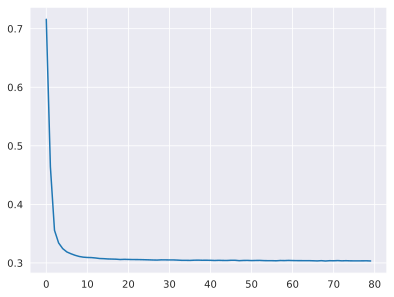

In [8]:
# Loss Curve
plt.plot(mlp.loss_curve_)

In [9]:
# Performance on test data
#-------------------------------------------------------------------

#print the confusion matrix and the confusion report results on the test data
print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))
tn, fp, fn, tp = confusion_matrix(y_test,predict_test).ravel()
specificity = tn / (tn+fp)


AUC = roc_auc_score(y_test,predict_test)
print("Specificity:", specificity)
print("AUC:", AUC)

[[1548  234]
 [ 339 2079]]
              precision    recall  f1-score   support

         0.0       0.82      0.87      0.84      1782
         1.0       0.90      0.86      0.88      2418

    accuracy                           0.86      4200
   macro avg       0.86      0.86      0.86      4200
weighted avg       0.87      0.86      0.86      4200

Specificity: 0.8686868686868687
AUC: 0.8642441787603079


epoch:  0
epoch:  1
epoch:  2
epoch:  3
epoch:  4
epoch:  5
epoch:  6
epoch:  7
epoch:  8
epoch:  9
epoch:  10
epoch:  11
epoch:  12
epoch:  13
epoch:  14
epoch:  15
epoch:  16
epoch:  17
epoch:  18
epoch:  19
epoch:  20
epoch:  21
epoch:  22
epoch:  23
epoch:  24


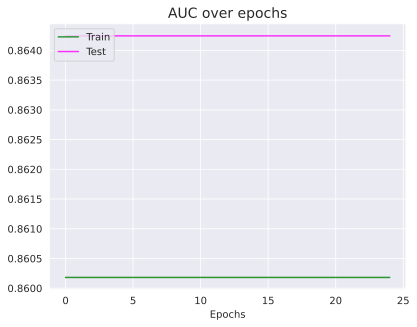

In [14]:
#Plot the AUC over epochs for Train and Test
#-------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.neural_network import MLPClassifier
np.random.seed(1)

mlp = MLPClassifier(hidden_layer_sizes=(2,4,4,1), activation='relu',solver='adam', max_iter=2000,learning_rate="constant", random_state=4,shuffle=True,batch_size=8)

""" mini-batch learning-> not to be used in out-of-core setting!

"""

N_TRAIN_SAMPLES = X_train.shape[0]
N_EPOCHS = 25
N_BATCH = 128
N_CLASSES = np.unique(y_train)

auc_train = []
auc_test = []

# EPOCH
epoch = 0
while epoch < N_EPOCHS:
    print('epoch: ', epoch)
    # SHUFFLING
    random_perm = np.random.permutation(X_train.shape[0])
    mini_batch_index = 0
    while True:
        # MINI-BATCH
        indices = random_perm[mini_batch_index:mini_batch_index + N_BATCH]
        mlp.partial_fit(X_train[indices], y_train[indices], classes=N_CLASSES)
        mini_batch_index += N_BATCH

        if mini_batch_index >= N_TRAIN_SAMPLES:
            break

    # SCORE TRAIN
    auc_train.append(roc_auc_score(y_train,predict_train))

    # SCORE TEST
    auc_test.append(roc_auc_score(y_test,predict_test))

    epoch += 1

""" Plot """
plt.plot(auc_train, color='green', alpha=0.8, label='Train')
plt.plot(auc_test, color='magenta', alpha=0.8, label='Test')
plt.title("AUC over epochs", fontsize=14)
plt.xlabel('Epochs')
plt.legend(loc='upper left')
plt.show()

### Fine Tune MLP
Gridsearch for fine tuning MLP Classifier

In [11]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import ShuffleSplit, GridSearchCV



cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=1)



param_grid = {

'hidden_layer_sizes':[2],

'activation': ['identity','logistic','tanh','relu'],

'solver': ['lbfgs','sgd','adam'],

'learning_rate':['constant','invscaling','adaptive']}



gridSearch = GridSearchCV(MLPClassifier(), param_grid, cv=cv,scoring=['recall','f1'],refit='f1',verbose=2)

gridSearch.fit(X_train,y_train)

print('Score: ', gridSearch.best_score_)

print('Parameters: ', gridSearch.best_params_)


Fitting 1 folds for each of 36 candidates, totalling 36 fits
[CV] END activation=identity, hidden_layer_sizes=2, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, hidden_layer_sizes=2, learning_rate=constant, solver=sgd; total time=   0.6s
[CV] END activation=identity, hidden_layer_sizes=2, learning_rate=constant, solver=adam; total time=   0.4s
[CV] END activation=identity, hidden_layer_sizes=2, learning_rate=invscaling, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, hidden_layer_sizes=2, learning_rate=invscaling, solver=sgd; total time=   0.8s
[CV] END activation=identity, hidden_layer_sizes=2, learning_rate=invscaling, solver=adam; total time=   0.6s
[CV] END activation=identity, hidden_layer_sizes=2, learning_rate=adaptive, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, hidden_layer_sizes=2, learning_rate=adaptive, solver=sgd; total time=   1.1s
[CV] END activation=identity, hidden_layer_sizes=2, learning_rate=ada

In [12]:
#predicted_values = gridSearch.predict(X_test)

#from sklearn.metrics import accuracy_score

#score = accuracy_score(y_test,predicted_values)

#print("Accuracy after tuning",score)

In [1]:
##print(predict_train.dtype)
#help(MLPClassifier)